# Regression test using Linear Neural Network

This notebook shows how to use Linear Neural Netorks to perform regression test between two variables. 

The independent variable *x* and the dependent variable *y*

In [2]:
%matplotlib inline

In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

### Generate fake data for training

To create the independent variabe *x*, we use `torch.randn`. It returns a tensor with *n* number of samples from a normally distibuted data. 

We calcuate *y* from *x* using any linear or non-linear formula we wish. Here I'm using:

y= 2.5.x^4 + x^2 - 5.x + x - 3 + random_value


Text(0, 0.5, 'Dependent Variable Y')

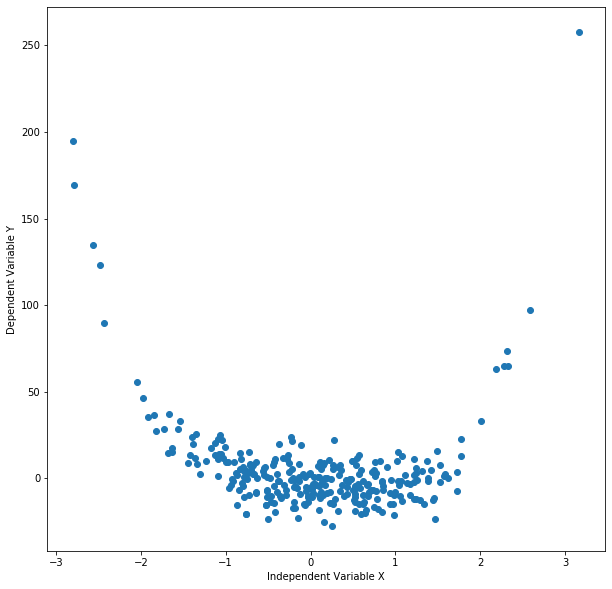

In [12]:
n= 300

x = torch.randn(n)
y = 2.5 * x**4 + x**2 - 5* x - 3 + 10 * torch.randn(n)

plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.xlabel('Independent Variable X')
plt.ylabel('Dependent Variable Y')

# Build the Neural Network 

I'm going to buid a simple NN with 5 linear layers, sigmoid as an activation function and batchnorm the input and hidden layers

In [90]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=1,out_features=100,bias=True)
        self.bn1 = nn.BatchNorm1d(100)
        self.layer2 = nn.Linear(in_features=100,out_features=300,bias=True)
        self.bn2 = nn.BatchNorm1d(300)
        self.layer3 = nn.Linear(in_features=300,out_features=300,bias=True)
        self.bn3 = nn.BatchNorm1d(300)
        self.layer4 = nn.Linear(in_features=300,out_features=100,bias=True)
        self.bn4 = nn.BatchNorm1d(100)
        self.layer5 = nn.Linear(in_features=100,out_features=1,bias=True)
        
    def forward(self,x):
        x = F.sigmoid(self.bn1(self.layer1(x)))
        x = F.sigmoid(self.bn2(self.layer2(x)))
        x = F.sigmoid(self.bn3(self.layer3(x)))
        x = F.sigmoid(self.bn4(self.layer4(x)))
        x = self.layer5(x)
        return x

    def learn(self,epochs,x,y,lr):
        loss_fun = nn.MSELoss()
        optimizer = torch.optim.SGD(self.parameters(),lr=lr,momentum=0.9,weight_decay=1e-5)
        losses=[]
        for epoch in range(epochs):
            optimizer.zero_grad()
            output = self(x)
            loss = loss_fun(output,y)
            losses.append(loss.item())
            loss.backward()
            if epoch%(epochs/20)==0: print("epoch:{} loss: {}".format(epoch,round(loss.item(),8)))
            optimizer.step()
        return losses
    
    @torch.no_grad()
    def predict(self,x):
        y = self(x)
        return y


In [91]:
net = Net()

Now we train the network for 1000 epochs and a learning rate of 1e-1

In [93]:
losses = net.learn(1000,x.view(-1,1),y.view(-1,1),1e-3)

epoch:0 loss: 781.40771484
epoch:50 loss: 638.453125
epoch:100 loss: 515.97198486
epoch:150 loss: 334.38867188
epoch:200 loss: 254.11650085
epoch:250 loss: 183.65139771
epoch:300 loss: 128.55580139
epoch:350 loss: 103.32323456
epoch:400 loss: 99.05825043
epoch:450 loss: 225.08366394
epoch:500 loss: 119.78746796
epoch:550 loss: 97.74994659
epoch:600 loss: 93.05509186
epoch:650 loss: 92.18851471
epoch:700 loss: 89.08055115
epoch:750 loss: 87.85218811
epoch:800 loss: 87.69791412
epoch:850 loss: 87.20914459
epoch:900 loss: 86.87741852
epoch:950 loss: 87.14714813


Let's plot the losses per epcoh

Text(0, 0.5, 'Loss')

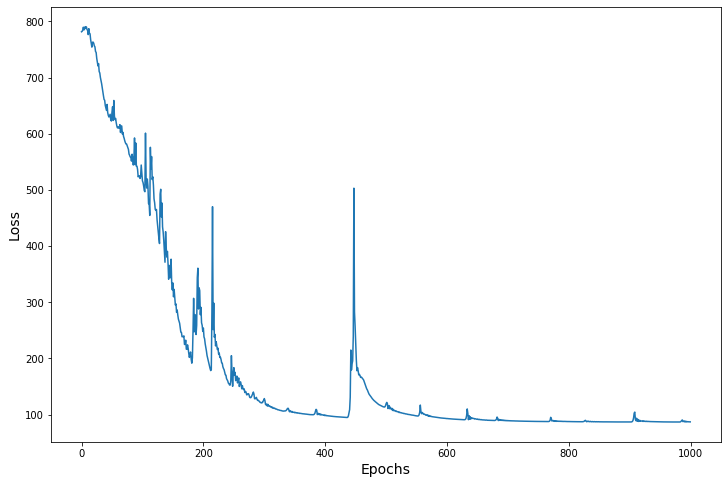

In [94]:
plt.figure(figsize=(12,8))
plt.plot(losses)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Loss',fontsize=14)

In [95]:
y_hat= net.predict(x.view(-1,1))

In [96]:
y_hat.shape

torch.Size([300, 1])

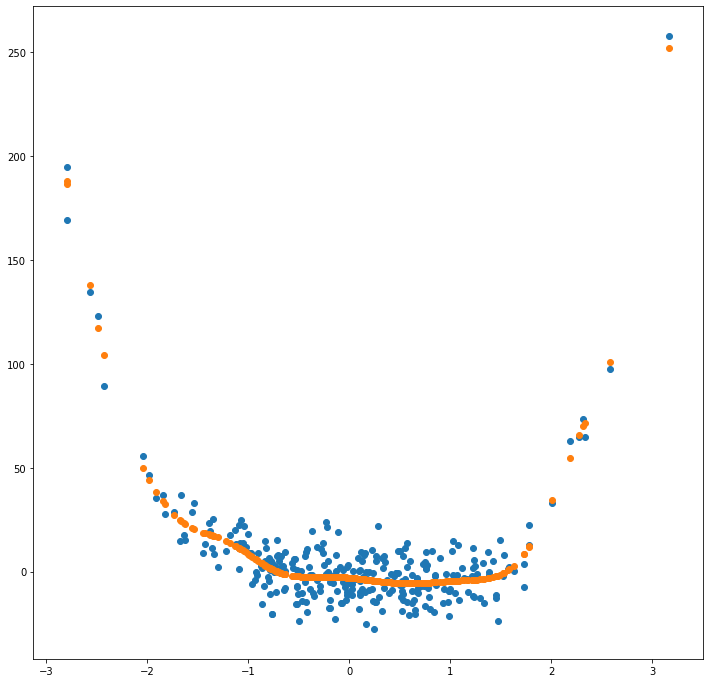

In [97]:
plt.figure(figsize=(12,12))
plt.scatter(x,y)
plt.scatter(x,y_hat)